In [1]:
import h5py
import scipy
import numpy as np
import torch

In [2]:
import h5py
import scipy
import numpy as np
import torch

In [3]:
base_dir = "/home/mafzhang/code/CHLA-Imputation-and-Prediction-for-Bay/log/prediction/MEXICO/"

In [4]:
label = np.load("/home/mafzhang/data/MEXICO/8d/trues.npy")
label_masks = np.load("/home/mafzhang/data/MEXICO/8d/true_masks.npy")

In [5]:
prediction_xg = np.load(base_dir+"XGBoost/with_imputation/prediction.npy", allow_pickle=True)
prediction_xg_wo = np.load(base_dir+"XGBoost/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_our = np.load(base_dir+"GraphTransformer/with_imputation/prediction.npy", allow_pickle=True)
prediction_our_wo = np.load(base_dir+"GraphTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_mtgnn = np.load(base_dir+"MTGNN/with_imputation/prediction.npy", allow_pickle=True)
prediction_mtgnn_wo = np.load(base_dir+"MTGNN/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_tsmixer = np.load(base_dir+"TSMixer/with_imputation/prediction.npy", allow_pickle=True)
prediction_tsmixer_wo = np.load(base_dir+"TSMixer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_crossformer = np.load(base_dir+"CrossFormer/with_imputation/prediction.npy", allow_pickle=True)
prediction_crossformer_wo = np.load(base_dir+"CrossFormer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_iTransformer = np.load(base_dir+"iTransformer/with_imputation/prediction.npy", allow_pickle=True)
prediction_iTransformer_wo = np.load(base_dir+"iTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_predrnn = np.load(base_dir+"PredRNN/with_imputation/prediction.npy", allow_pickle=True)
prediction_predrnn_wo = np.load(base_dir+"PredRNN/without_imputation/prediction_0.npy", allow_pickle=True)

In [6]:
label_masks = label_masks.squeeze()
label = label.squeeze()
label = torch.from_numpy(label)
label_masks = torch.from_numpy(label_masks)

In [7]:
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_wo = torch.from_numpy(prediction_our_wo).squeeze()
prediction_xg = torch.from_numpy(prediction_xg).squeeze().median(1).values
prediction_xg_wo = torch.from_numpy(prediction_xg_wo).squeeze()
prediction_tsmixer = torch.from_numpy(prediction_tsmixer).squeeze().median(1).values
prediction_tsmixer_wo = torch.from_numpy(prediction_tsmixer_wo).squeeze()
prediction_mtgnn = torch.from_numpy(prediction_mtgnn).squeeze().median(1).values
prediction_mtgnn_wo = torch.from_numpy(prediction_mtgnn_wo).squeeze()
prediction_crossformer = torch.from_numpy(prediction_crossformer).squeeze().median(1).values
prediction_crossformer_wo = torch.from_numpy(prediction_crossformer_wo).squeeze()
prediction_iTransformer = torch.from_numpy(prediction_iTransformer).squeeze().median(1).values
prediction_iTransformer_wo = torch.from_numpy(prediction_iTransformer_wo).squeeze()
prediction_predrnn = torch.from_numpy(prediction_predrnn).squeeze().median(1).values
prediction_predrnn_wo = torch.from_numpy(prediction_predrnn_wo).squeeze()

1:500
2:2000

-93.97916412353516 -89.02082824707031
28.520832061767578 29.979164123535156


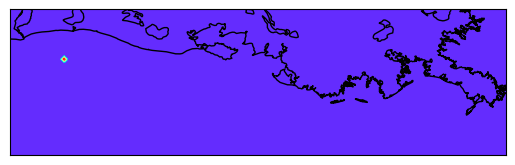

In [16]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
import h5py
from numpy import meshgrid

n=500
is_sea = np.load("/home/mafzhang/data/MEXICO/8d/is_sea.npy")
lon = np.load("/home/mafzhang/data/MEXICO/8d/long.npy")
lati = np.load("/home/mafzhang/data/MEXICO/8d/lati.npy")
tmp = np.zeros((2907))
tmp[n]=1
tmp2 = np.zeros_like(is_sea)
tmp2[is_sea.astype(bool)]=tmp

lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
print(lon1, lon2)
print(lati1, lati2)
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='h')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='h',grid=1.25)
map.drawcoastlines()
map.contourf(lon, lati, tmp2, levels=np.linspace(0, 1, 10),cmap="rainbow")

In [9]:
index = [46*i for i in range(306//46)]
prediction_our[index].shape

torch.Size([6, 10, 46, 2907])

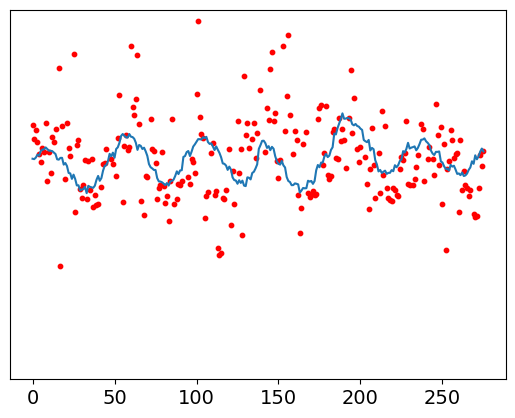

tensor(0.1615)


In [17]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,2907))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="STImp")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)


# plt.legend()
plt.xticks(fontsize=14)
plt.yticks([])
plt.ylim(-0.5,1.5)
plt.show()
tmp = np.nan_to_num(tmp, nan=0)
print((np.abs(mean- tmp[:,n])*tmp_mask[:,n]).sum()/(tmp_mask[:,n].sum()+1e-5))

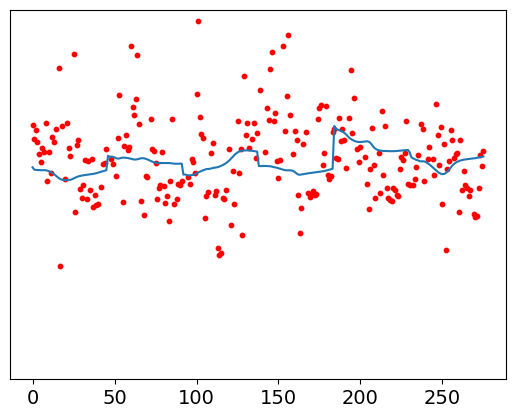

tensor(0.1751)


In [18]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_predrnn_wo[index].reshape(276,1, 2907))
predict = predict[:,0,n]

plt.plot(np.arange(276), predict, label="PredRNN")

# plt.legend()
plt.xticks(fontsize=14)
plt.yticks([])
plt.ylim(-0.5,1.5)
plt.show()
tmp = np.nan_to_num(tmp, nan=0)
print((np.abs(predict- tmp[:,n])*tmp_mask[:,n]).sum()/(tmp_mask[:,n].sum()+1e-5))

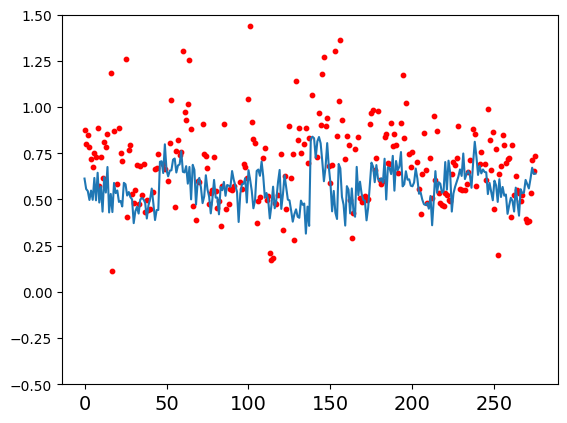

tensor(0.1923, dtype=torch.float64)


In [19]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_xg_wo[index].reshape(276,1, 2907))
predict = predict[:,0,n]

plt.plot(np.arange(276), predict, label="PredRNN")

# plt.legend()
plt.xticks(fontsize=14)
# plt.yticks([])
plt.ylim(-0.5,1.5)
plt.show()
tmp = np.nan_to_num(tmp, nan=0)
print((np.abs(predict- tmp[:,n])*tmp_mask[:,n]).sum()/(tmp_mask[:,n].sum()+1e-5))

In [ ]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np

t = 13
is_sea = np.load("/home/mafzhang/data/MEXICO/8d/is_sea.npy")
tmp = deepcopy(label[0,t,:])
tmp[~label_masks[0,t,:].bool()] = np.nan
ob = np.zeros((is_sea.shape[0],is_sea.shape[1]))
ob[is_sea.astype(bool)] = tmp
ob[~is_sea.astype(bool)]= np.nan
lon = np.load("/home/mafzhang/data/MEXICO/8d/long.npy")
lati = np.load("/home/mafzhang/data/MEXICO/8d/lati.npy")

x, y = lon, lati


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(x, y, ob, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend="both")

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
# map.colorbar(boundaries=np.linspace(-1.5, 1.5, 20), ticks=np.linspace(-1.5, 1.5, 6))

In [ ]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np

t = 13
tmp = deepcopy(prediction_our[0,:, t,:].mean(0))
pre = np.zeros((is_sea.shape[0],is_sea.shape[1]))
pre[is_sea.astype(bool)] = tmp
pre[~is_sea.astype(bool)]= np.nan


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(x, y, pre, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
# map.colorbar(boundaries=np.linspace(-1.5, 1.5, 20), ticks=np.linspace(-1.5, 1.5, 20))

In [ ]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np

t = 13
tmp = deepcopy(prediction_predrnn_wo[0, t,:])
pre = np.zeros((is_sea.shape[0],is_sea.shape[1]))
pre[is_sea.astype(bool)] = tmp
pre[~is_sea.astype(bool)]= np.nan


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(x, y, pre, levels=np.linspace(-1.5, 1.5, 40),cmap="rainbow",extend='both')